## Problem 1
Analyze the Zachary’s Karate Club graph using spectral modularity maximization algorithm. 

In [1]:
import networkx as nx
import numpy as np

In [3]:
def spectral_mod_algo(G):
    n = G.number_of_nodes()
    nodes = list(G.nodes())
    B = get_modularity_matrix(G)
    
    values, vectors = np.linalg.eig(B)
    v_max = max(values)
    index = list(values).index(v_max)
    vect = np.array(np.transpose(vectors[:,index]))[0]
    vect_items = [(nodes[i],vect[i]) for i in range(G.number_of_nodes())]
    vect_items_plus = [x[0] for x in vect_items if x[1]>=0]
    vect_items_minus =[x[0] for x in vect_items if x[1]<0]
    return [set(vect_items_plus), set(vect_items_minus)]

In [2]:
def get_modularity_matrix(G):
    n = G.number_of_nodes()
    m = G.number_of_edges()
    A = nx.adjacency_matrix(G)
    D_matrix = np.zeros((n,n))
    degrees = list(dict(G.degree()).values())
    
    for i in range(n-1):
        for j in range(i,n):
            d_ij = degrees[i] * degrees[j]/(2*m)
            D_matrix[i,j] = d_ij
            D_matrix[j,i] = d_ij
    B = A - D_matrix
    return B

In [4]:
G = nx.karate_club_graph()

In [5]:
groups = spectral_mod_algo(G)
groups = list(groups)

In [6]:
groups

[{0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

In [7]:
for community in range(len(groups)):
    print(f'Community {community}')
    for member in groups[community]:
        print(f'{member}: {G.nodes[member]["club"]}')

Community 0
0: Mr. Hi
1: Mr. Hi
2: Mr. Hi
3: Mr. Hi
4: Mr. Hi
5: Mr. Hi
6: Mr. Hi
7: Mr. Hi
10: Mr. Hi
11: Mr. Hi
12: Mr. Hi
13: Mr. Hi
16: Mr. Hi
17: Mr. Hi
19: Mr. Hi
21: Mr. Hi
Community 1
32: Officer
33: Officer
8: Mr. Hi
9: Officer
14: Officer
15: Officer
18: Officer
20: Officer
22: Officer
23: Officer
24: Officer
25: Officer
26: Officer
27: Officer
28: Officer
29: Officer
30: Officer
31: Officer


## Problem 2
Analyze the Zachary’s Karate Club graph using louvain algorithm. 

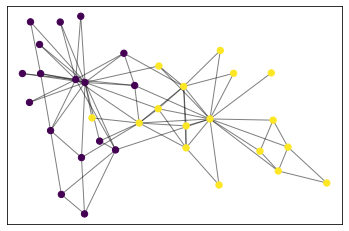

In [8]:
import community #https://python-louvain.readthedocs.io/en/latest/
import matplotlib.cm as cm
import matplotlib.pyplot as plt

partition = community.best_partition(G, resolution=2)

pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [9]:
partition

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 0,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 0,
 15: 0,
 16: 1,
 17: 1,
 18: 0,
 19: 1,
 20: 0,
 21: 1,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0}

In [10]:
for group in np.unique(list(partition.values())):
    print(group)
    members = [k for k,v in partition.items() if v == group]
    for member in members:
        print(f'{member}: {G.nodes[member]["club"]}')

0
8: Mr. Hi
14: Officer
15: Officer
18: Officer
20: Officer
22: Officer
23: Officer
24: Officer
25: Officer
26: Officer
27: Officer
28: Officer
29: Officer
30: Officer
31: Officer
32: Officer
33: Officer
1
0: Mr. Hi
1: Mr. Hi
2: Mr. Hi
3: Mr. Hi
4: Mr. Hi
5: Mr. Hi
6: Mr. Hi
7: Mr. Hi
9: Officer
10: Mr. Hi
11: Mr. Hi
12: Mr. Hi
13: Mr. Hi
16: Mr. Hi
17: Mr. Hi
19: Mr. Hi
21: Mr. Hi
